In [6]:
import pandas as pd
import matplotlib.pyplot as plt # Import matplotlib for plotting 
import matplotlib.cm as cm # Import colormaps

In [3]:
age_file_path = "/global/scratch/users/yougsanghvi/suiciderate_adm0_who_gmd_countries_by_age_sex_selfinflicted_injuries_1950_2022.csv"
age_data = pd.read_csv(age_file_path)

In [4]:
age_data

Region Code WHO_Region Country_Code       Country  Year     Sex  \
0               EU     Europe          ALB       Albania  1987     All   
1               EU     Europe          ALB       Albania  1987     All   
2               EU     Europe          ALB       Albania  1987     All   
3               EU     Europe          ALB       Albania  1987     All   
4               EU     Europe          ALB       Albania  1987     All   
...            ...        ...          ...           ...   ...     ...   
303697          AS       Asia          SAU  Saudi Arabia  2021  Female   
303698          AS       Asia          SAU  Saudi Arabia  2021  Female   
303699          AS       Asia          SAU  Saudi Arabia  2021  Female   
303700          AS       Asia          SAU  Saudi Arabia  2021  Female   
303701          AS       Asia          SAU  Saudi Arabia  2021  Female   

       Age_group_code Age_Group  Number_self_inflicted_deaths  \
0         Age_unknown   Unknown                           0.0   
1          Age85_over       85+                           1.0   
2            Age80_84     80-84                           0.0   
3            Age75_79     75-79                           1.0   
4            Age70_74     70-74                           0.0   
...               ...       ...                           ...   
303697       Age65_69     65-69                           4.0   
303698       Age70_74     70-74                          10.0   
303699       Age75_79     75-79                          14.0   
303700       Age80_84     80-84                           6.0   
303701     Age85_over       85+                           9.0   

        Pct_self_inflicted_of_total_deaths  \
0                                      NaN   
1                                 0.044924   
2                                 0.000000   
3                                 0.047281   
4                                 0.000000   
...                                    ...   
303697                            0.152265   
303698                            0.331565   
303699                            0.385356   
303700                            0.175336   
303701                            0.179390   

        Age_standardized_suicide_rate_per_100000  Suicide_rate_per_100000  
0                                            NaN                      NaN  
1                                            NaN                10.000000  
2                                            NaN                 0.000000  
3                                            NaN                 3.246753  
4                                            NaN                 0.000000  
...                                          ...                      ...  
303697                                       NaN                 2.807451  
303698                                       NaN                11.169066  
303699                                       NaN                22.022967  
303700                                       NaN                15.500271  
303701                                       NaN                25.751810  

[303702 rows x 12 columns]

In [9]:
print(age_data['Age_Group'].unique())

['Unknown' '85+' '80-84' '75-79' '70-74' '65-69' '60-64' '55-59' '50-54'
 '45-49' '40-44' '35-39' '30-34' '25-29' '20-24' '15-19' '10-14' '5-9'
 '1-4' '0' 'All']


Column names: ['Region Code', 'WHO_Region', 'Country_Code', 'Country', 'Year', 'Sex', 'Age_group_code', 'Age_Group', 'Number_self_inflicted_deaths', 'Pct_self_inflicted_of_total_deaths', 'Age_standardized_suicide_rate_per_100000', 'Suicide_rate_per_100000']

Unique Age Groups: ['Unknown' '85+' '80-84' '75-79' '70-74' '65-69' '60-64' '55-59' '50-54'
 '45-49' '40-44' '35-39' '30-34' '25-29' '20-24' '15-19' '10-14' '5-9'
 '1-4' '0' 'All']
Unique Sexes: ['All' 'Male' 'Female' 'Unknown']


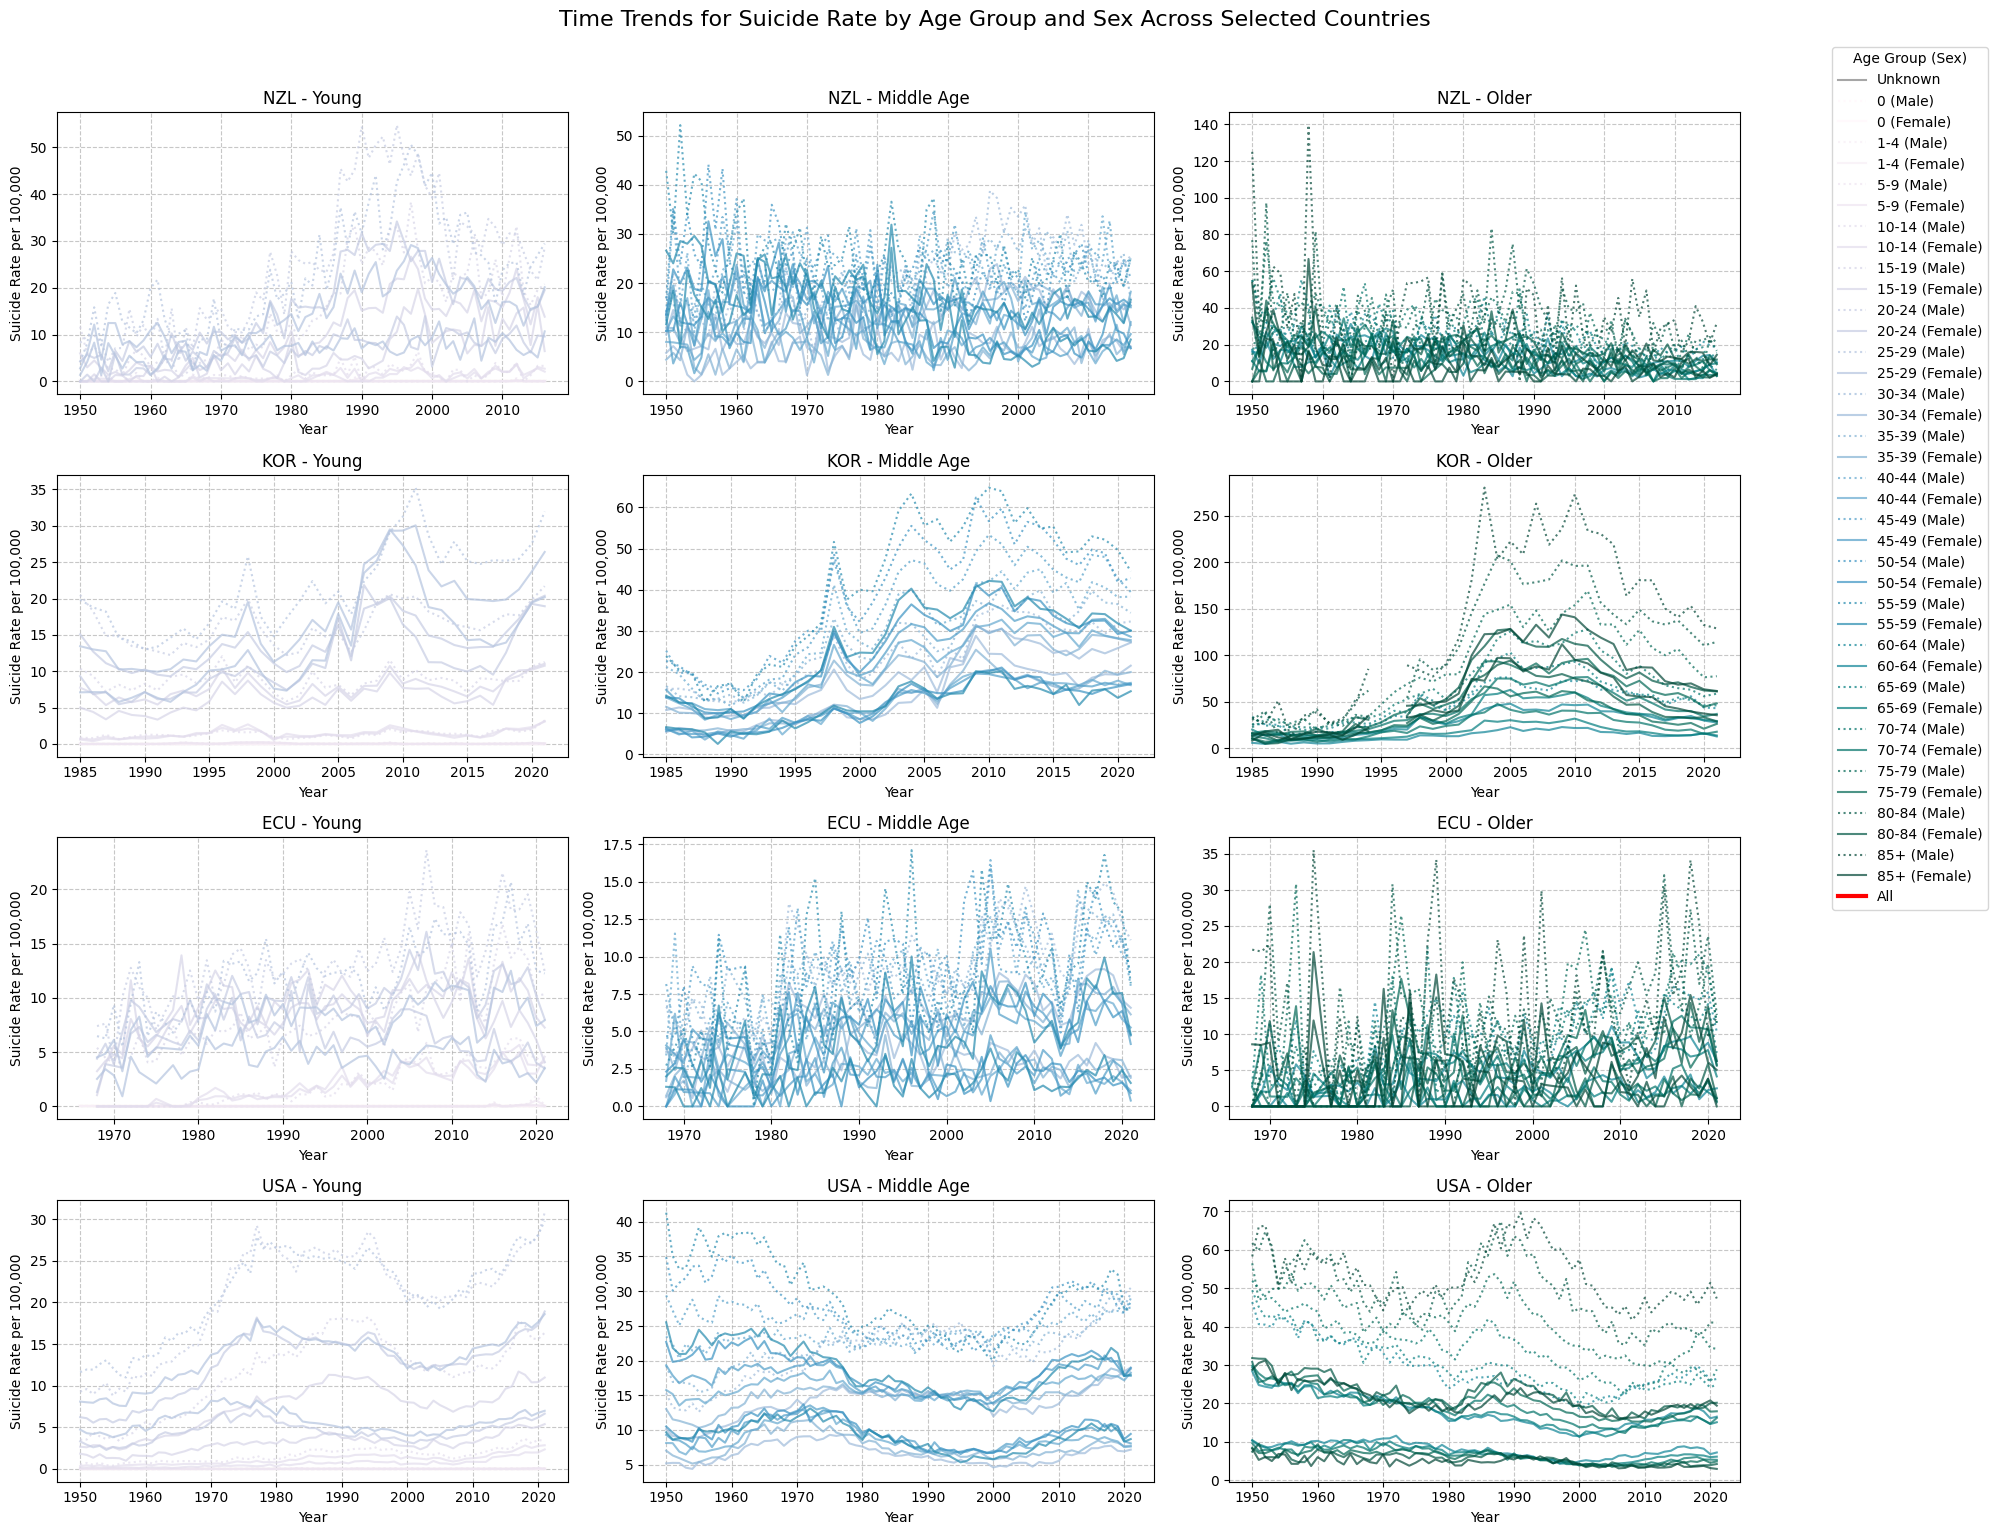

In [ ]:

# --- Plotting Time Trends by Age Group for Specific Countries ---

# Define the list of countries for analysis
target_countries = ['NZL', 'MEX', 'KOR', 'JPN', 'ECU', 'USA', 'CHL', 'BRA']

# Ensure 'Year' is treated as a numerical type
age_data['Year'] = pd.to_numeric(age_data['Year'], errors='coerce')
# Drop rows where 'Year' is NaN after coercion
age_data.dropna(subset=['Year'], inplace=True)

# Define a custom sorting key for age groups to ensure logical order
def sort_age_group_key(age_group):
    if age_group == 'All':
        return 1000 # Place 'All' at the end for consistent legend sorting
    if age_group == 'Unknown':
        return -1 # Place 'Unknown' at the beginning
    if age_group == '0':
        return 0
    if '+' in age_group:
        return int(age_group.replace('+', ''))
    if '-' in age_group:
        start_age = int(age_group.split('-')[0])
        return start_age
    return 999 # Fallback for any other labels, though not expected here

# Get all unique age groups and sort them using the custom key
all_age_groups = age_data['Age_Group'].unique().tolist()
sorted_age_groups = sorted(all_age_groups, key=sort_age_group_key)

# Separate 'All' and 'Unknown' from the main age range groups for coloring
numeric_age_groups = [ag for ag in sorted_age_groups if ag not in ['All', 'Unknown']]

# Choose a colormap for the numeric age groups (e.g., 'viridis', 'plasma', 'cividis')
cmap = cm.viridis
colors = [cmap(i / (len(numeric_age_groups) - 1)) for i in range(len(numeric_age_groups))]

# Create a mapping from age group label to color
age_group_to_color = {}
j = 0
for ag in sorted_age_groups:
    if ag == 'All':
        age_group_to_color[ag] = 'red' # Distinct color for 'All'
    elif ag == 'Unknown':
        age_group_to_color[ag] = 'gray' # Distinct color for 'Unknown'
    elif ag in numeric_age_groups: # Ensure we only apply gradient to numeric groups
        age_group_to_color[ag] = colors[j]
        j += 1
    else:
        age_group_to_color[ag] = 'black' # Fallback for unexpected labels


# Create a figure to hold all subplots
num_countries = len(target_countries)
ncols = 3
nrows = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows), sharex=False, sharey=False)
axes = axes.flatten()

# Iterate through each target country and create a separate plot
for i, country_code in enumerate(target_countries):
    country_data = age_data[age_data['Country_Code'] == country_code].copy()

    if not country_data.empty:
        country_grouped_data = country_data.groupby(['Year', 'Age_Group'])['Suicide_rate_per_100000'].mean().unstack()

        # Plot on the current subplot axis
        # Ensure that only columns (age groups) that have corresponding colors are plotted
        # Also, plot in a sorted order to ensure consistent line drawing
        age_groups_in_country_data = [col for col in country_grouped_data.columns if col in age_group_to_color]
        sorted_age_groups_for_plot = sorted(age_groups_in_country_data, key=sort_age_group_key)

        for age_group in sorted_age_groups_for_plot:
            line_color = age_group_to_color.get(age_group, 'black') # Default to black if not found

            if age_group == 'All':
                country_grouped_data[age_group].plot(ax=axes[i], legend=False,
                                                     color=line_color, linewidth=3, alpha=1.0)
            else:
                country_grouped_data[age_group].plot(ax=axes[i], legend=False,
                                                     color=line_color, linewidth=1.5, alpha=0.3)

        axes[i].set_title(f'Suicide Rate Trends in {country_code}')
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Suicide Rate per 100,000')
        axes[i].grid(True, linestyle='--', alpha=0.7)
    else:
        axes[i].set_title(f'No data for {country_code}')
        axes[i].set_visible(False)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Create a single legend for the entire figure
handles, labels = [], []

# Use the globally sorted age groups for legend consistency
for age_group_label in sorted_age_groups:
    color = age_group_to_color.get(age_group_label, 'black')
    if age_group_label == 'All':
        line, = plt.plot([], [], label=age_group_label, color=color, linewidth=3, alpha=1.0)
    else:
        line, = plt.plot([], [], label=age_group_label, color=color, linewidth=1.5, alpha=0.3)
    handles.append(line)
    labels.append(age_group_label)

fig.suptitle('Time Trends for Suicide Rate by Age Group Across Selected Countries', fontsize=16, y=1.02)
# Position the legend
fig.legend(handles, labels, title='Age Group', loc='upper right', bbox_to_anchor=(1.0, 1))
plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.show()


Column names: ['Region Code', 'WHO_Region', 'Country_Code', 'Country', 'Year', 'Sex', 'Age_group_code', 'Age_Group', 'Number_self_inflicted_deaths', 'Pct_self_inflicted_of_total_deaths', 'Age_standardized_suicide_rate_per_100000', 'Suicide_rate_per_100000']

Unique Age Groups: ['Unknown' '85+' '80-84' '75-79' '70-74' '65-69' '60-64' '55-59' '50-54'
 '45-49' '40-44' '35-39' '30-34' '25-29' '20-24' '15-19' '10-14' '5-9'
 '1-4' '0' 'All']
Unique Sexes: ['All' 'Male' 'Female' 'Unknown']


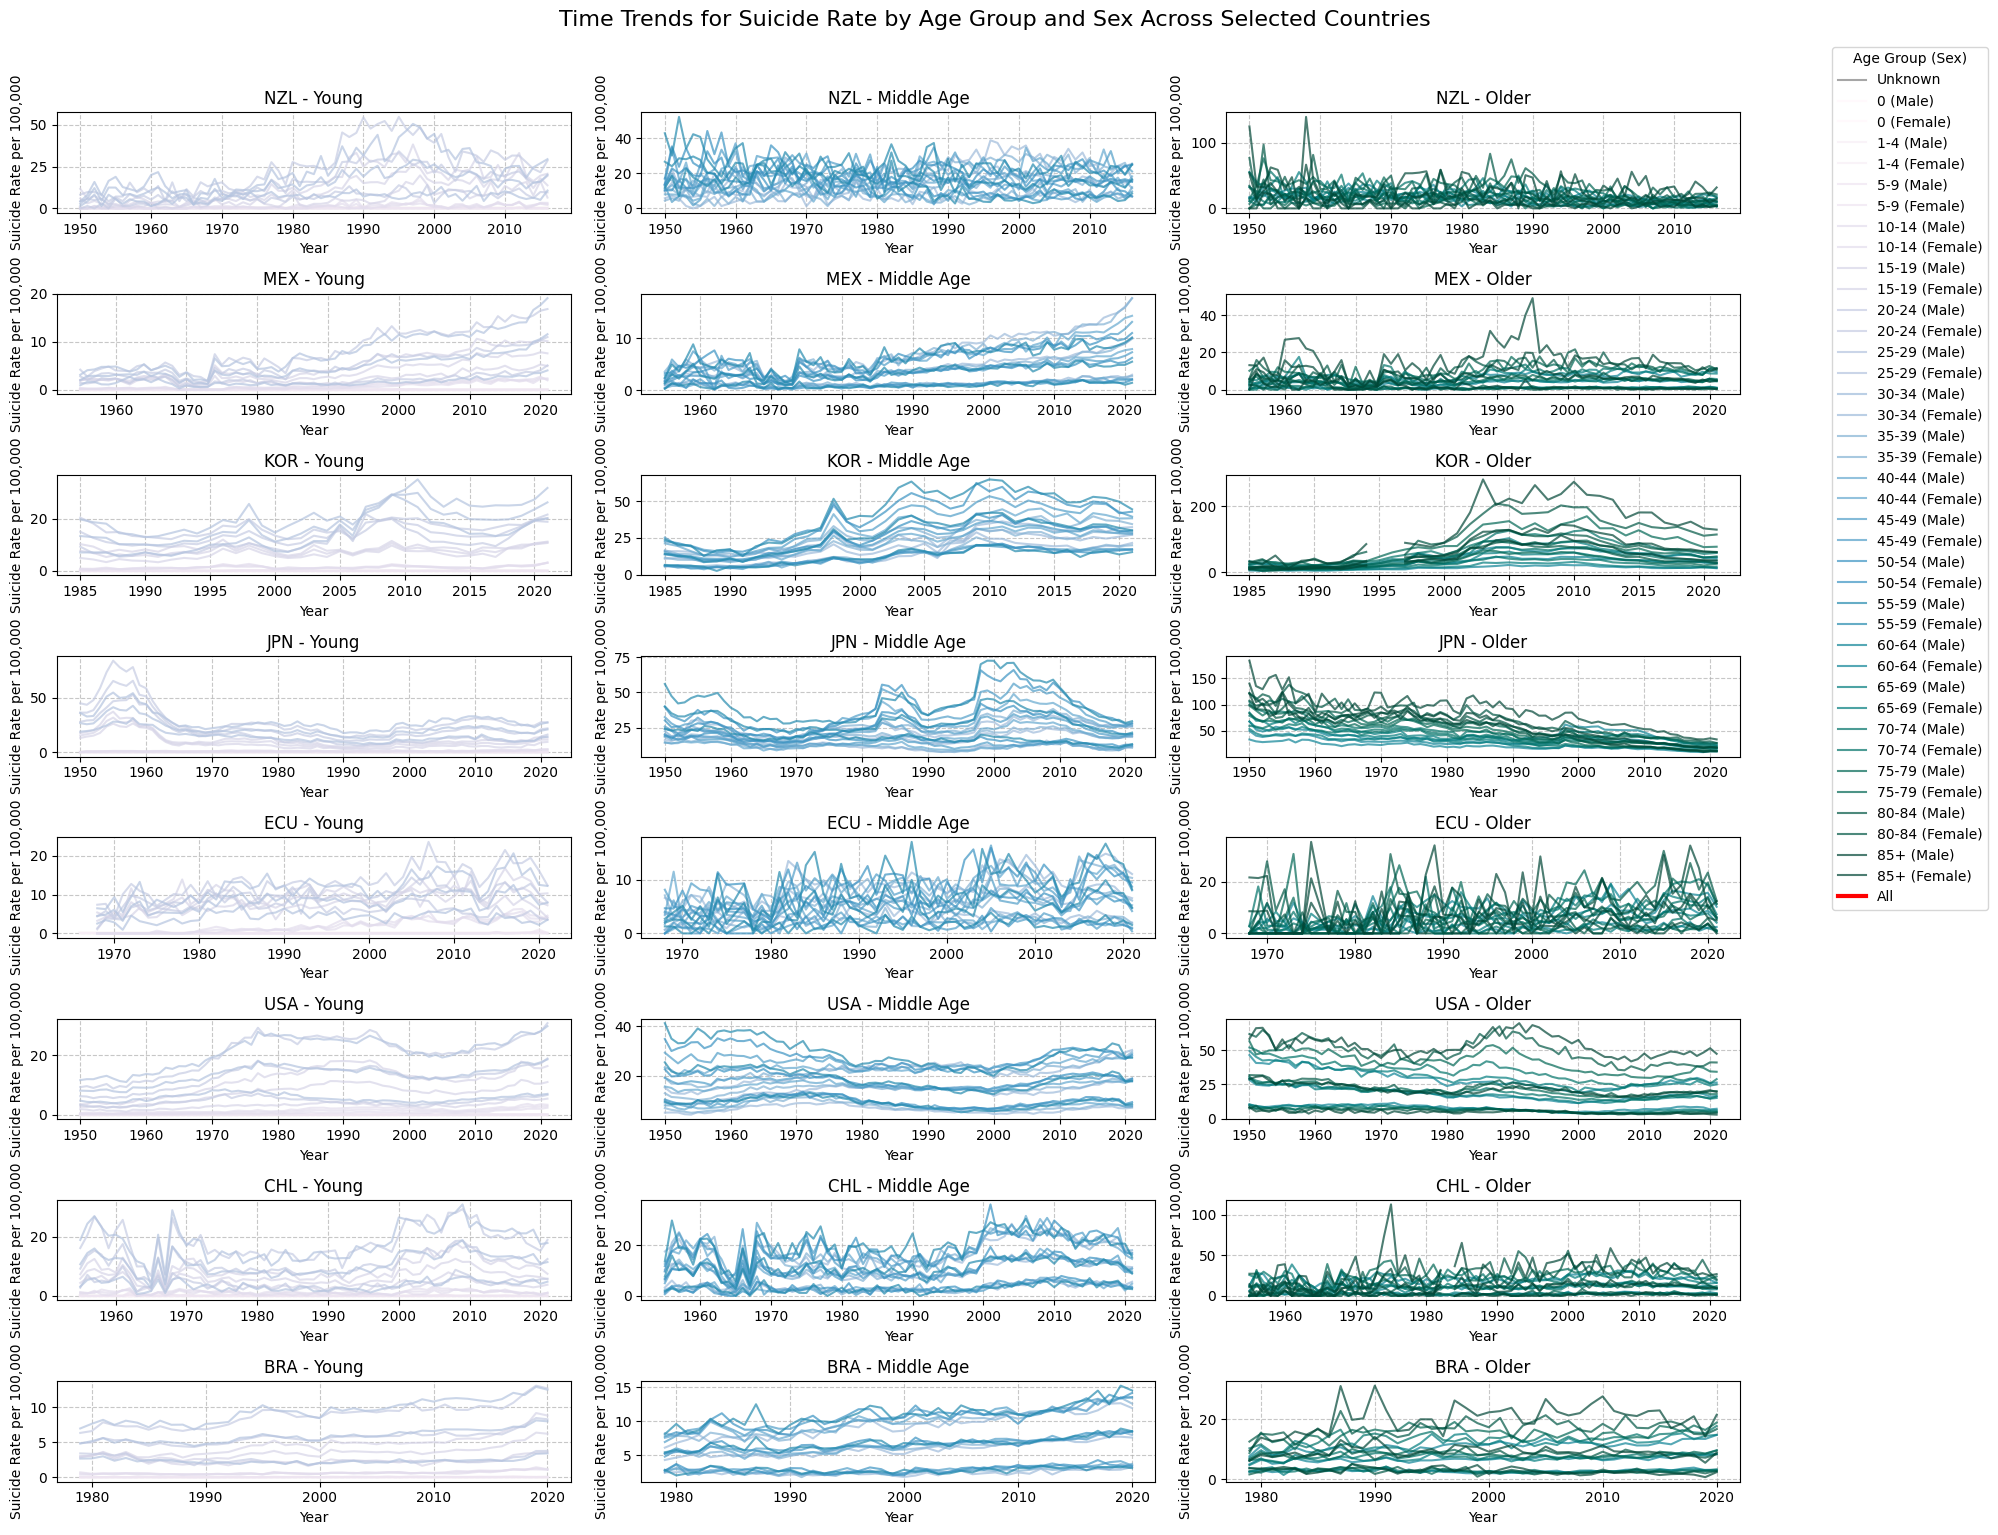

In [12]:
# Plotting by age and gender 

# Path to the suicide rate data file.
age_file_path = "/global/scratch/users/yougsanghvi/suiciderate_adm0_who_gmd_countries_by_age_sex_selfinflicted_injuries_1950_2022.csv"

# Load CSV file into a pandas DataFrame.
age_data = pd.read_csv(age_file_path)

# Print column names.
print("Column names:", age_data.columns.tolist())

# Print unique age groups and sexes.
print("\nUnique Age Groups:", age_data['Age_Group'].unique())
print("Unique Sexes:", age_data['Sex'].unique())


# --- Plotting Time Trends by Age Group and Sex for Specific Countries ---

# Define target countries for analysis.
target_countries = ['NZL', 'MEX', 'KOR', 'JPN', 'ECU', 'USA', 'CHL', 'BRA']

# Convert 'Year' to numeric, dropping rows with coercion errors.
age_data['Year'] = pd.to_numeric(age_data['Year'], errors='coerce')
age_data.dropna(subset=['Year'], inplace=True)

# Create a combined 'Age_Group_Sex' column for plot labels.
age_data['Age_Group_Sex'] = age_data['Age_Group'] + ' (' + age_data['Sex'] + ')'

# Custom function to sort age groups and combined labels logically for plotting and legend.
def sort_label_key(label):
    original_age_group = label.split(' (')[0] if ' (' in label else label
    sex_part = label.split(' (')[-1].replace(')', '') if ' (' in label else ''

    age_order = 999
    if original_age_group == 'All':
        age_order = 1000
    elif original_age_group == 'Unknown':
        age_order = -1
    elif original_age_group == '0':
        age_order = 0
    elif '+' in original_age_group:
        try:
            age_order = int(original_age_group.replace('+', ''))
        except ValueError:
            pass
    elif '-' in original_age_group:
        try:
            start_age = int(original_age_group.split('-')[0])
            age_order = start_age
        except ValueError:
            pass

    # Sort sexes: Male before Female.
    sex_order = 0 if sex_part == 'Male' else (1 if sex_part == 'Female' else 2)

    return (age_order, sex_order)


# Define age ranges for three plot categories.
young_ages = ['0', '1-4', '5-9', '10-14', '15-19', '20-24', '25-29']
middle_ages = ['30-34', '35-39', '40-44', '45-49', '50-54', '55-59']
older_ages = ['60-64', '65-69', '70-74', '75-79', '80-84', '85+']

# Map original Age_Group labels to their categories.
age_category_mapping = {}
for ag in age_data['Age_Group'].unique():
    if ag in young_ages:
        age_category_mapping[ag] = 'Young'
    elif ag in middle_ages:
        age_category_mapping[ag] = 'Middle Age'
    elif ag in older_ages:
        age_category_mapping[ag] = 'Older'

age_data['Age_Category'] = age_data['Age_Group'].map(age_category_mapping)

# Filter out rows not belonging to defined age categories.
filtered_data_for_plotting = age_data.dropna(subset=['Age_Category']).copy()

# Get unique age groups for color mapping, excluding 'All' and 'Unknown'.
relevant_age_groups_for_color = [ag for ag in age_data['Age_Group'].unique() if ag not in ['All', 'Unknown']]
# Sort for consistent color gradient application.
numeric_age_groups_sorted_for_color = sorted(relevant_age_groups_for_color, key=sort_label_key)

# Choose colormap ('PuBuGn') and generate colors for each base age group.
cmap = cm.PuBuGn
colors = [cmap(i / (len(numeric_age_groups_sorted_for_color) - 1))
          for i in range(len(numeric_age_groups_sorted_for_color))]
# Create mapping from age group label to base color.
age_group_base_color_map = {ag: colors[i] for i, ag in enumerate(numeric_age_groups_sorted_for_color)}

# Define order of age categories for consistent subplot display.
age_categories_for_plot_order = ['Young', 'Middle Age', 'Older']

# Set up figure and subplot grid.
num_countries_to_plot = len(target_countries)
num_age_categories_per_country = len(age_categories_for_plot_order)
total_plots = num_countries_to_plot * num_age_categories_per_country

# Set grid columns for balanced visual layout.
ncols = 3
nrows = (total_plots + ncols - 1) // ncols

# Create figure and subplots with independent X and Y axes.
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15), sharex=False, sharey=False)
axes = axes.flatten()

plot_idx = 0
# Iterate through each target country and age category to create plots.
for country_code in target_countries:
    for age_category in age_categories_for_plot_order:
        ax = axes[plot_idx]
        plot_idx += 1

        # Filter data for the current country and age category.
        subset_data = filtered_data_for_plotting[
            (filtered_data_for_plotting['Country_Code'] == country_code) &
            (filtered_data_for_plotting['Age_Category'] == age_category)
        ].copy()

        if not subset_data.empty:
            # Group data by Year and combined 'Age_Group_Sex' for plotting.
            grouped_plot_data = subset_data.groupby(['Year', 'Age_Group_Sex'])['Suicide_rate_per_100000'].mean().unstack()

            # Sort columns (Age_Group_Sex labels) for consistent plotting order.
            sorted_cols = sorted(grouped_plot_data.columns, key=sort_label_key)

            # Plot each line individually with specific colors and styles.
            for col_label in sorted_cols:
                original_age_group = col_label.split(' (')[0]
                line_color = age_group_base_color_map.get(original_age_group, 'black') # Default color

                grouped_plot_data[col_label].plot(ax=ax, legend=False,
                                                  color=line_color, linewidth=1.5, alpha=0.7)

            # Set title and labels for the current subplot.
            ax.set_title(f'{country_code} - {age_category}')
            ax.set_xlabel('Year')
            ax.set_ylabel('Suicide Rate per 100,000')
            ax.grid(True, linestyle='--', alpha=0.7)
        else:
            # Handle cases with no data for a given country-age_category.
            ax.set_title(f'{country_code} - {age_category} (No Data)')
            ax.set_visible(False)

# Remove any unused subplots from the grid.
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

# --- Create a single comprehensive legend for the entire figure ---
handles, labels = [], []

# Generate all possible unique legend labels.
all_unique_age_groups_from_data = age_data['Age_Group'].unique().tolist()
all_unique_sexes_from_data = age_data['Sex'].unique().tolist()

# Consider 'Male' and 'Female' sexes for combined labels.
sexes_for_legend = [s for s in all_unique_sexes_from_data if s in ['Male', 'Female']]

full_legend_labels_set = set()
for ag_group in all_unique_age_groups_from_data:
    if ag_group in ['All', 'Unknown']:
        full_legend_labels_set.add(ag_group)
    else:
        for sex_val in sexes_for_legend:
            full_legend_labels_set.add(f"{ag_group} ({sex_val})")

# Sort legend labels for consistent order.
sorted_full_legend_labels = sorted(list(full_legend_labels_set), key=sort_label_key)

# Create proxy lines for the legend with correct colors and styles.
for legend_label in sorted_full_legend_labels:
    line_color = 'black'
    line_width = 1.5
    line_alpha = 0.7

    if legend_label == 'All':
        line_color = 'red'
        line_width = 3
        line_alpha = 1.0
    elif legend_label == 'Unknown':
        line_color = 'gray'
        line_width = 1.5
        line_alpha = 0.7
    else:
        original_age_group_for_color = legend_label.split(' (')[0]
        line_color = age_group_base_color_map.get(original_age_group_for_color, 'black')

    # Create an invisible line for the legend entry.
    line, = plt.plot([], [], label=legend_label, color=line_color, linewidth=line_width, alpha=line_alpha)
    handles.append(line)
    labels.append(legend_label)

# Set the main title for the figure.
fig.suptitle('Time Trends for Suicide Rate by Age Group and Sex Across Selected Countries', fontsize=16, y=1.02)
# Position the legend outside all subplots.
fig.legend(handles, labels, title='Age Group (Sex)', loc='upper right', bbox_to_anchor=(1.0, 1))
# Adjust layout to make space for the legend.
plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.show()


Column names: ['Region Code', 'WHO_Region', 'Country_Code', 'Country', 'Year', 'Sex', 'Age_group_code', 'Age_Group', 'Number_self_inflicted_deaths', 'Pct_self_inflicted_of_total_deaths', 'Age_standardized_suicide_rate_per_100000', 'Suicide_rate_per_100000']

Unique Age Groups: ['Unknown' '85+' '80-84' '75-79' '70-74' '65-69' '60-64' '55-59' '50-54'
 '45-49' '40-44' '35-39' '30-34' '25-29' '20-24' '15-19' '10-14' '5-9'
 '1-4' '0' 'All']
Unique Sexes: ['All' 'Male' 'Female' 'Unknown']


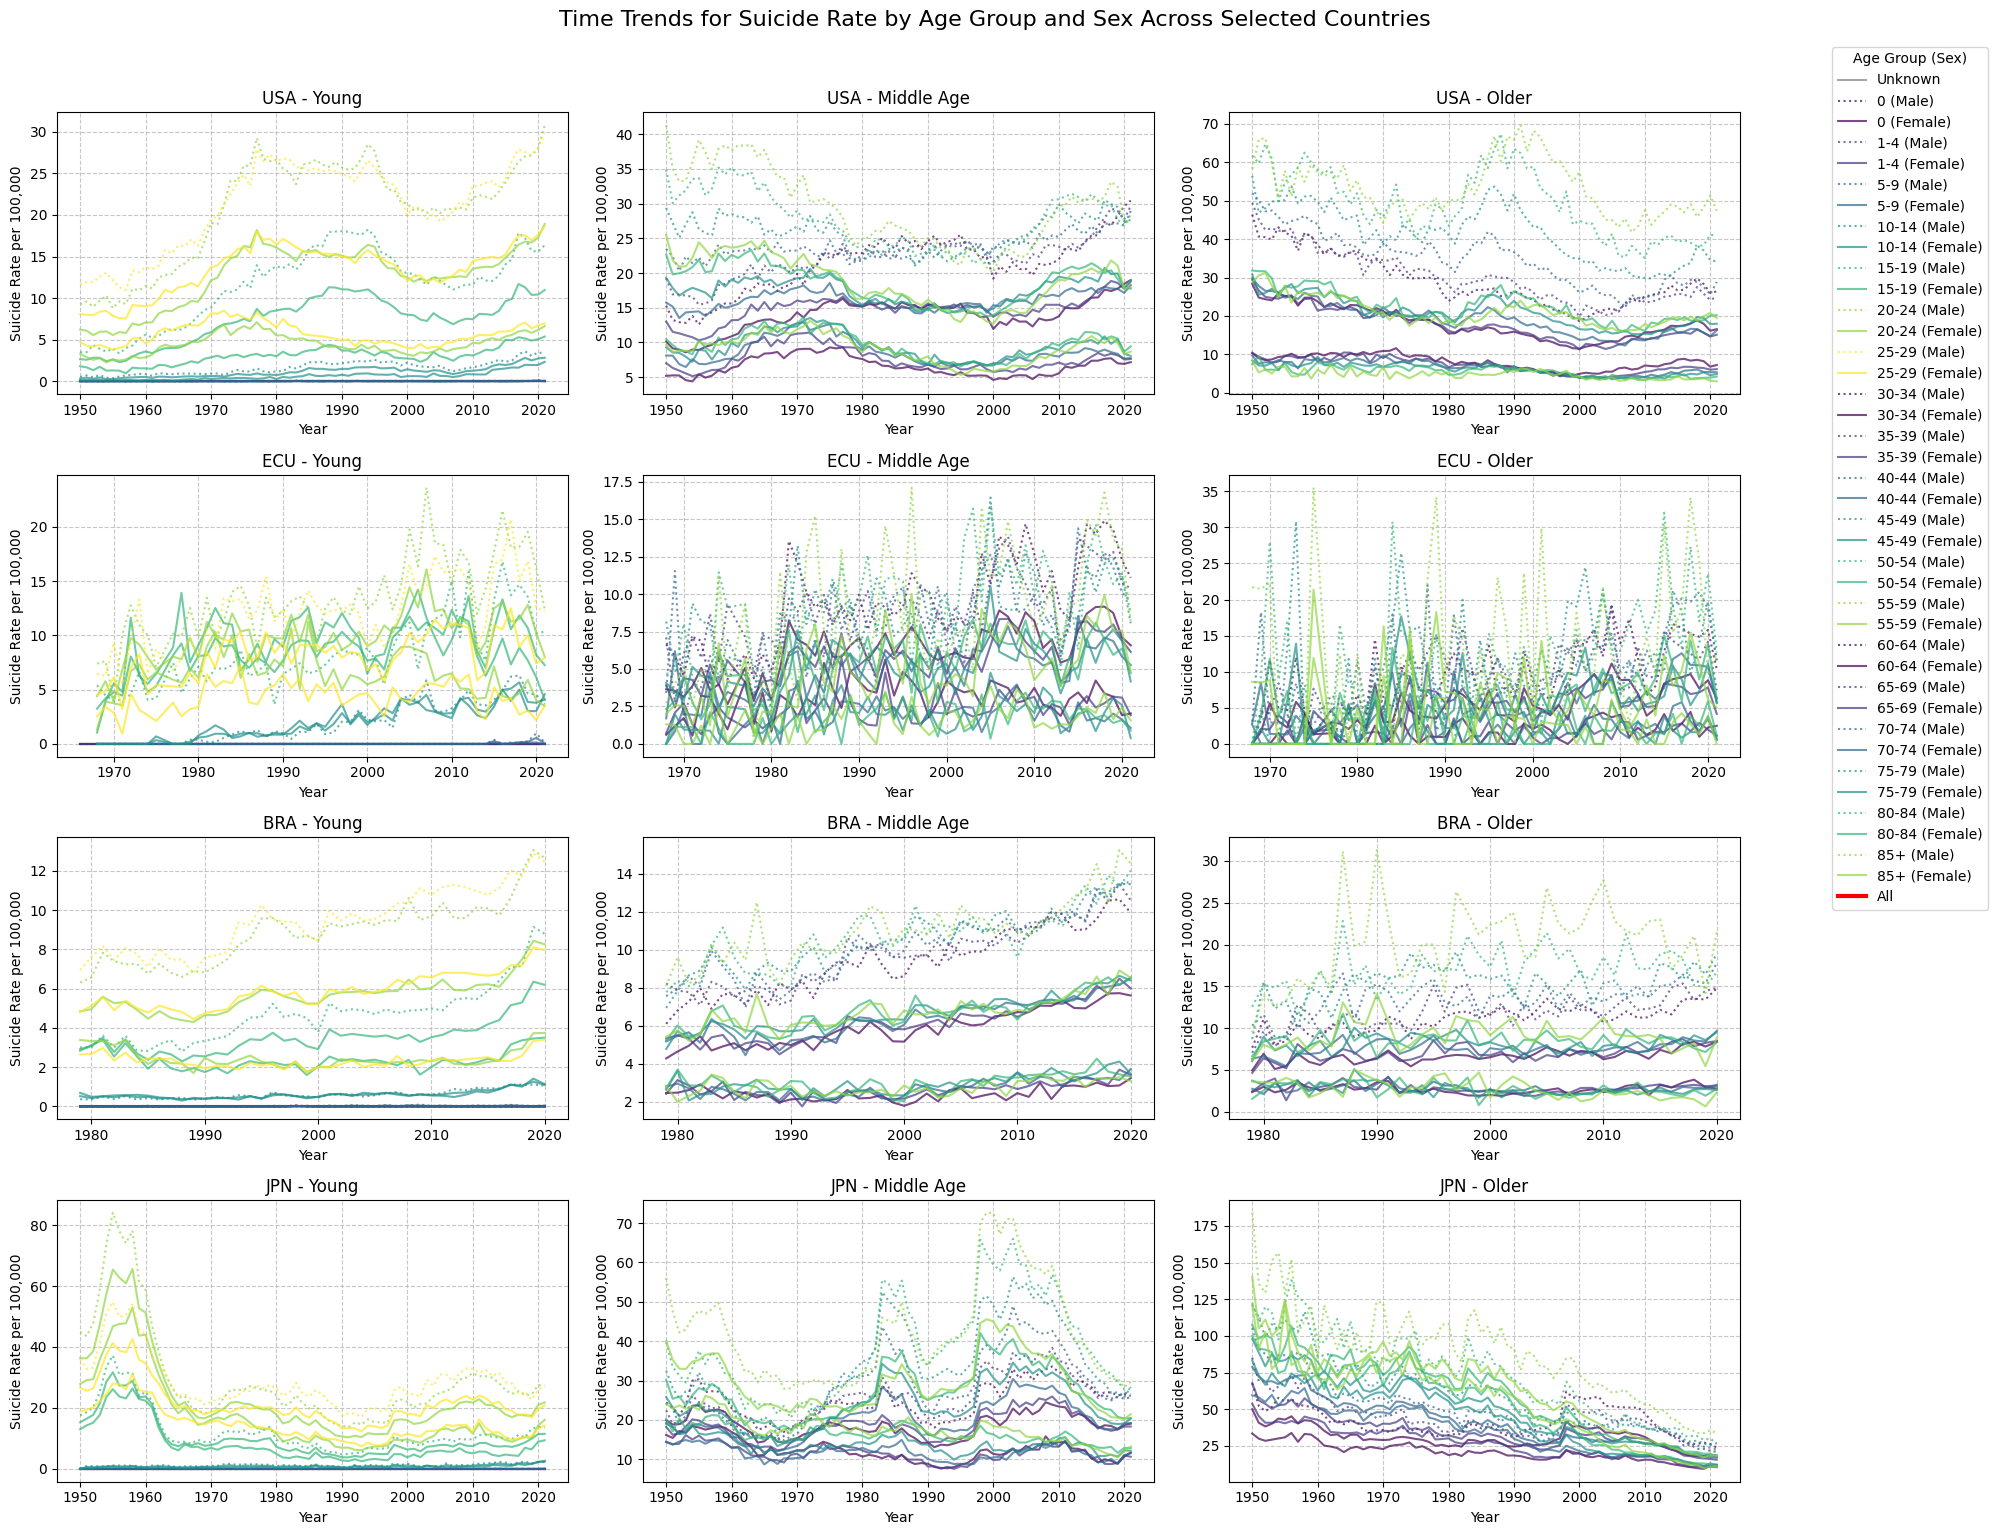

In [14]:
# Assuming pandas, matplotlib.pyplot, and matplotlib.cm are already imported in the environment.

# Path to the suicide rate data file.
age_file_path = "/global/scratch/users/yougsanghvi/suiciderate_adm0_who_gmd_countries_by_age_sex_selfinflicted_injuries_1950_2022.csv"

# Load CSV file into a pandas DataFrame.
age_data = pd.read_csv(age_file_path)

# Print column names.
print("Column names:", age_data.columns.tolist())

# Print unique age groups and sexes.
print("\nUnique Age Groups:", age_data['Age_Group'].unique())
print("Unique Sexes:", age_data['Sex'].unique())


# --- Plotting Time Trends by Age Group and Sex for Specific Countries ---

# Define target countries for analysis.
target_countries = ['USA', 'ECU', 'BRA', 'JPN'] # Updated target countries

# Convert 'Year' to numeric, dropping rows with coercion errors.
age_data['Year'] = pd.to_numeric(age_data['Year'], errors='coerce')
age_data.dropna(subset=['Year'], inplace=True)

# Create a combined 'Age_Group_Sex' column for plot labels.
age_data['Age_Group_Sex'] = age_data['Age_Group'] + ' (' + age_data['Sex'] + ')'

# Custom function to sort age groups and combined labels logically for plotting and legend.
def sort_label_key(label):
    original_age_group = label.split(' (')[0] if ' (' in label else label
    sex_part = label.split(' (')[-1].replace(')', '') if ' (' in label else ''

    age_order = 999
    if original_age_group == 'All':
        age_order = 1000
    elif original_age_group == 'Unknown':
        age_order = -1
    elif original_age_group == '0':
        age_order = 0
    elif '+' in original_age_group:
        try:
            age_order = int(original_age_group.replace('+', ''))
        except ValueError:
            pass
    elif '-' in original_age_group:
        try:
            start_age = int(original_age_group.split('-')[0])
            age_order = start_age
        except ValueError:
            pass

    # Sort sexes: Male before Female.
    sex_order = 0 if sex_part == 'Male' else (1 if sex_part == 'Female' else 2)

    return (age_order, sex_order)


# Define age ranges for three plot categories.
young_ages = ['0', '1-4', '5-9', '10-14', '15-19', '20-24', '25-29']
middle_ages = ['30-34', '35-39', '40-44', '45-49', '50-54', '55-59']
older_ages = ['60-64', '65-69', '70-74', '75-79', '80-84', '85+']

# Map original Age_Group labels to their categories.
age_category_mapping = {}
for ag in age_data['Age_Group'].unique():
    if ag in young_ages:
        age_category_mapping[ag] = 'Young'
    elif ag in middle_ages:
        age_category_mapping[ag] = 'Middle Age'
    elif ag in older_ages:
        age_category_mapping[ag] = 'Older'

age_data['Age_Category'] = age_data['Age_Group'].map(age_category_mapping)

# Filter out rows not belonging to defined age categories.
filtered_data_for_plotting = age_data.dropna(subset=['Age_Category']).copy()

# Determine the maximum number of age groups in any category to define the colormap size.
max_age_groups_in_category = max(len(young_ages), len(middle_ages), len(older_ages))

# Choose colormap ('PuBuGn') and generate colors based on the maximum category size.
# This ensures a consistent gradient for relative positions across categories.
cmap = cm.viridis
category_colors = [cmap(i / (max_age_groups_in_category - 1)) for i in range(max_age_groups_in_category)]

# Define order of age categories for consistent subplot display.
age_categories_for_plot_order = ['Young', 'Middle Age', 'Older']

# Set up figure and subplot grid.
num_countries_to_plot = len(target_countries)
num_age_categories_per_country = len(age_categories_for_plot_order)
total_plots = num_countries_to_plot * num_age_categories_per_country

# Set grid columns for balanced visual layout.
ncols = 3 # Updated columns to 3
nrows = (total_plots + ncols - 1) // ncols

# Create figure and subplots with independent X and Y axes.
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15), sharex=False, sharey=False)
axes = axes.flatten()

plot_idx = 0
# Iterate through each target country and age category to create plots.
for country_code in target_countries:
    for age_category in age_categories_for_plot_order:
        ax = axes[plot_idx]
        plot_idx += 1

        # Filter data for the current country and age category.
        subset_data = filtered_data_for_plotting[
            (filtered_data_for_plotting['Country_Code'] == country_code) &
            (filtered_data_for_plotting['Age_Category'] == age_category)
        ].copy()

        if not subset_data.empty:
            # Group data by Year and combined 'Age_Group_Sex' for plotting.
            grouped_plot_data = subset_data.groupby(['Year', 'Age_Group_Sex'])['Suicide_rate_per_100000'].mean().unstack()

            # Plot each line individually with specific colors and styles.
            for col_label in sorted(grouped_plot_data.columns, key=sort_label_key):
                original_age_group = col_label.split(' (')[0]
                sex_part = col_label.split(' (')[-1].replace(')', '') if ' (' in col_label else ''

                # Determine the age category for the current original_age_group
                age_cat_for_plot = age_category_mapping.get(original_age_group)

                line_color = 'black' # Default fallback
                if age_cat_for_plot: # Only proceed if the age group maps to a category
                    # Get the reference list of age groups for THIS category
                    if age_cat_for_plot == 'Young':
                        ref_age_list = young_ages
                    elif age_cat_for_plot == 'Middle Age':
                        ref_age_list = middle_ages
                    elif age_cat_for_plot == 'Older':
                        ref_age_list = older_ages
                    else:
                        ref_age_list = [] # Should not happen

                    # Find the color index based on its position within its category's *full* list.
                    try:
                        color_index = sorted(ref_age_list, key=sort_label_key).index(original_age_group)
                        line_color = category_colors[color_index]
                    except ValueError:
                        line_color = 'black' # Fallback
                
                linestyle = ':' if sex_part == 'Male' else '-' # Dotted for Male, solid for Female

                grouped_plot_data[col_label].plot(ax=ax, legend=False,
                                                  color=line_color, linewidth=1.5, alpha=0.7, linestyle=linestyle)

            # Set title and labels for the current subplot.
            ax.set_title(f'{country_code} - {age_category}')
            ax.set_xlabel('Year')
            ax.set_ylabel('Suicide Rate per 100,000')
            ax.grid(True, linestyle='--', alpha=0.7)
        else:
            # Handle cases with no data for a given country-age_category.
            ax.set_title(f'{country_code} - {age_category} (No Data)')
            ax.set_visible(False)

# Remove any unused subplots from the grid.
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

# --- Create a single comprehensive legend for the entire figure ---
handles, labels = [], []

# Generate all possible unique legend labels.
all_unique_age_groups_from_data = age_data['Age_Group'].unique().tolist()
all_unique_sexes_from_data = age_data['Sex'].unique().tolist()

# Consider 'Male' and 'Female' sexes for combined labels.
sexes_for_legend = [s for s in all_unique_sexes_from_data if s in ['Male', 'Female']]

full_legend_labels_set = set()
for ag_group in all_unique_age_groups_from_data:
    if ag_group in ['All', 'Unknown']:
        full_legend_labels_set.add(ag_group)
    else:
        for sex_val in sexes_for_legend:
            full_legend_labels_set.add(f"{ag_group} ({sex_val})")

# Sort legend labels for consistent order.
sorted_full_legend_labels = sorted(list(full_legend_labels_set), key=sort_label_key)

# Create proxy lines for the legend with correct colors and styles.
for legend_label in sorted_full_legend_labels:
    line_color = 'black'
    line_width = 1.5
    line_alpha = 0.7
    linestyle = '-' # Default to solid

    if legend_label == 'All':
        line_color = 'red'
        line_width = 3
        line_alpha = 1.0
    elif legend_label == 'Unknown':
        line_color = 'gray'
        line_width = 1.5
        line_alpha = 0.7
    else:
        original_age_group_for_color = legend_label.split(' (')[0]
        sex_part = legend_label.split(' (')[-1].replace(')', '') if ' (' in legend_label else ''

        # Determine which age category this legend_label's age group belongs to.
        age_cat_for_legend = age_category_mapping.get(original_age_group_for_color)

        if age_cat_for_legend:
            # Get the sorted list of age groups for that specific category.
            if age_cat_for_legend == 'Young':
                category_specific_age_groups = young_ages
            elif age_cat_for_legend == 'Middle Age':
                category_specific_age_groups = middle_ages
            elif age_cat_for_legend == 'Older':
                category_specific_age_groups = older_ages
            else:
                category_specific_age_groups = [] # Should not happen

            # Find the color index based on its position within its category.
            try:
                color_index = sorted(category_specific_age_groups, key=sort_label_key).index(original_age_group_for_color)
                line_color = category_colors[color_index]
            except ValueError:
                line_color = 'black' # Fallback
        else:
            line_color = 'black' # Fallback if age group not in a defined category

        if sex_part == 'Male':
            linestyle = ':'

    # Create an invisible line for the legend entry.
    line, = plt.plot([], [], label=legend_label, color=line_color, linewidth=line_width, alpha=line_alpha, linestyle=linestyle)
    handles.append(line)
    labels.append(legend_label)

# Set the main title for the figure.
fig.suptitle('Time Trends for Suicide Rate by Age Group and Sex Across Selected Countries', fontsize=16, y=1.02)
# Position the legend outside all subplots.
fig.legend(handles, labels, title='Age Group (Sex)', loc='upper right', bbox_to_anchor=(1.0, 1))
# Adjust layout to make space for the legend.
plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.show()



Generating plots for: USA


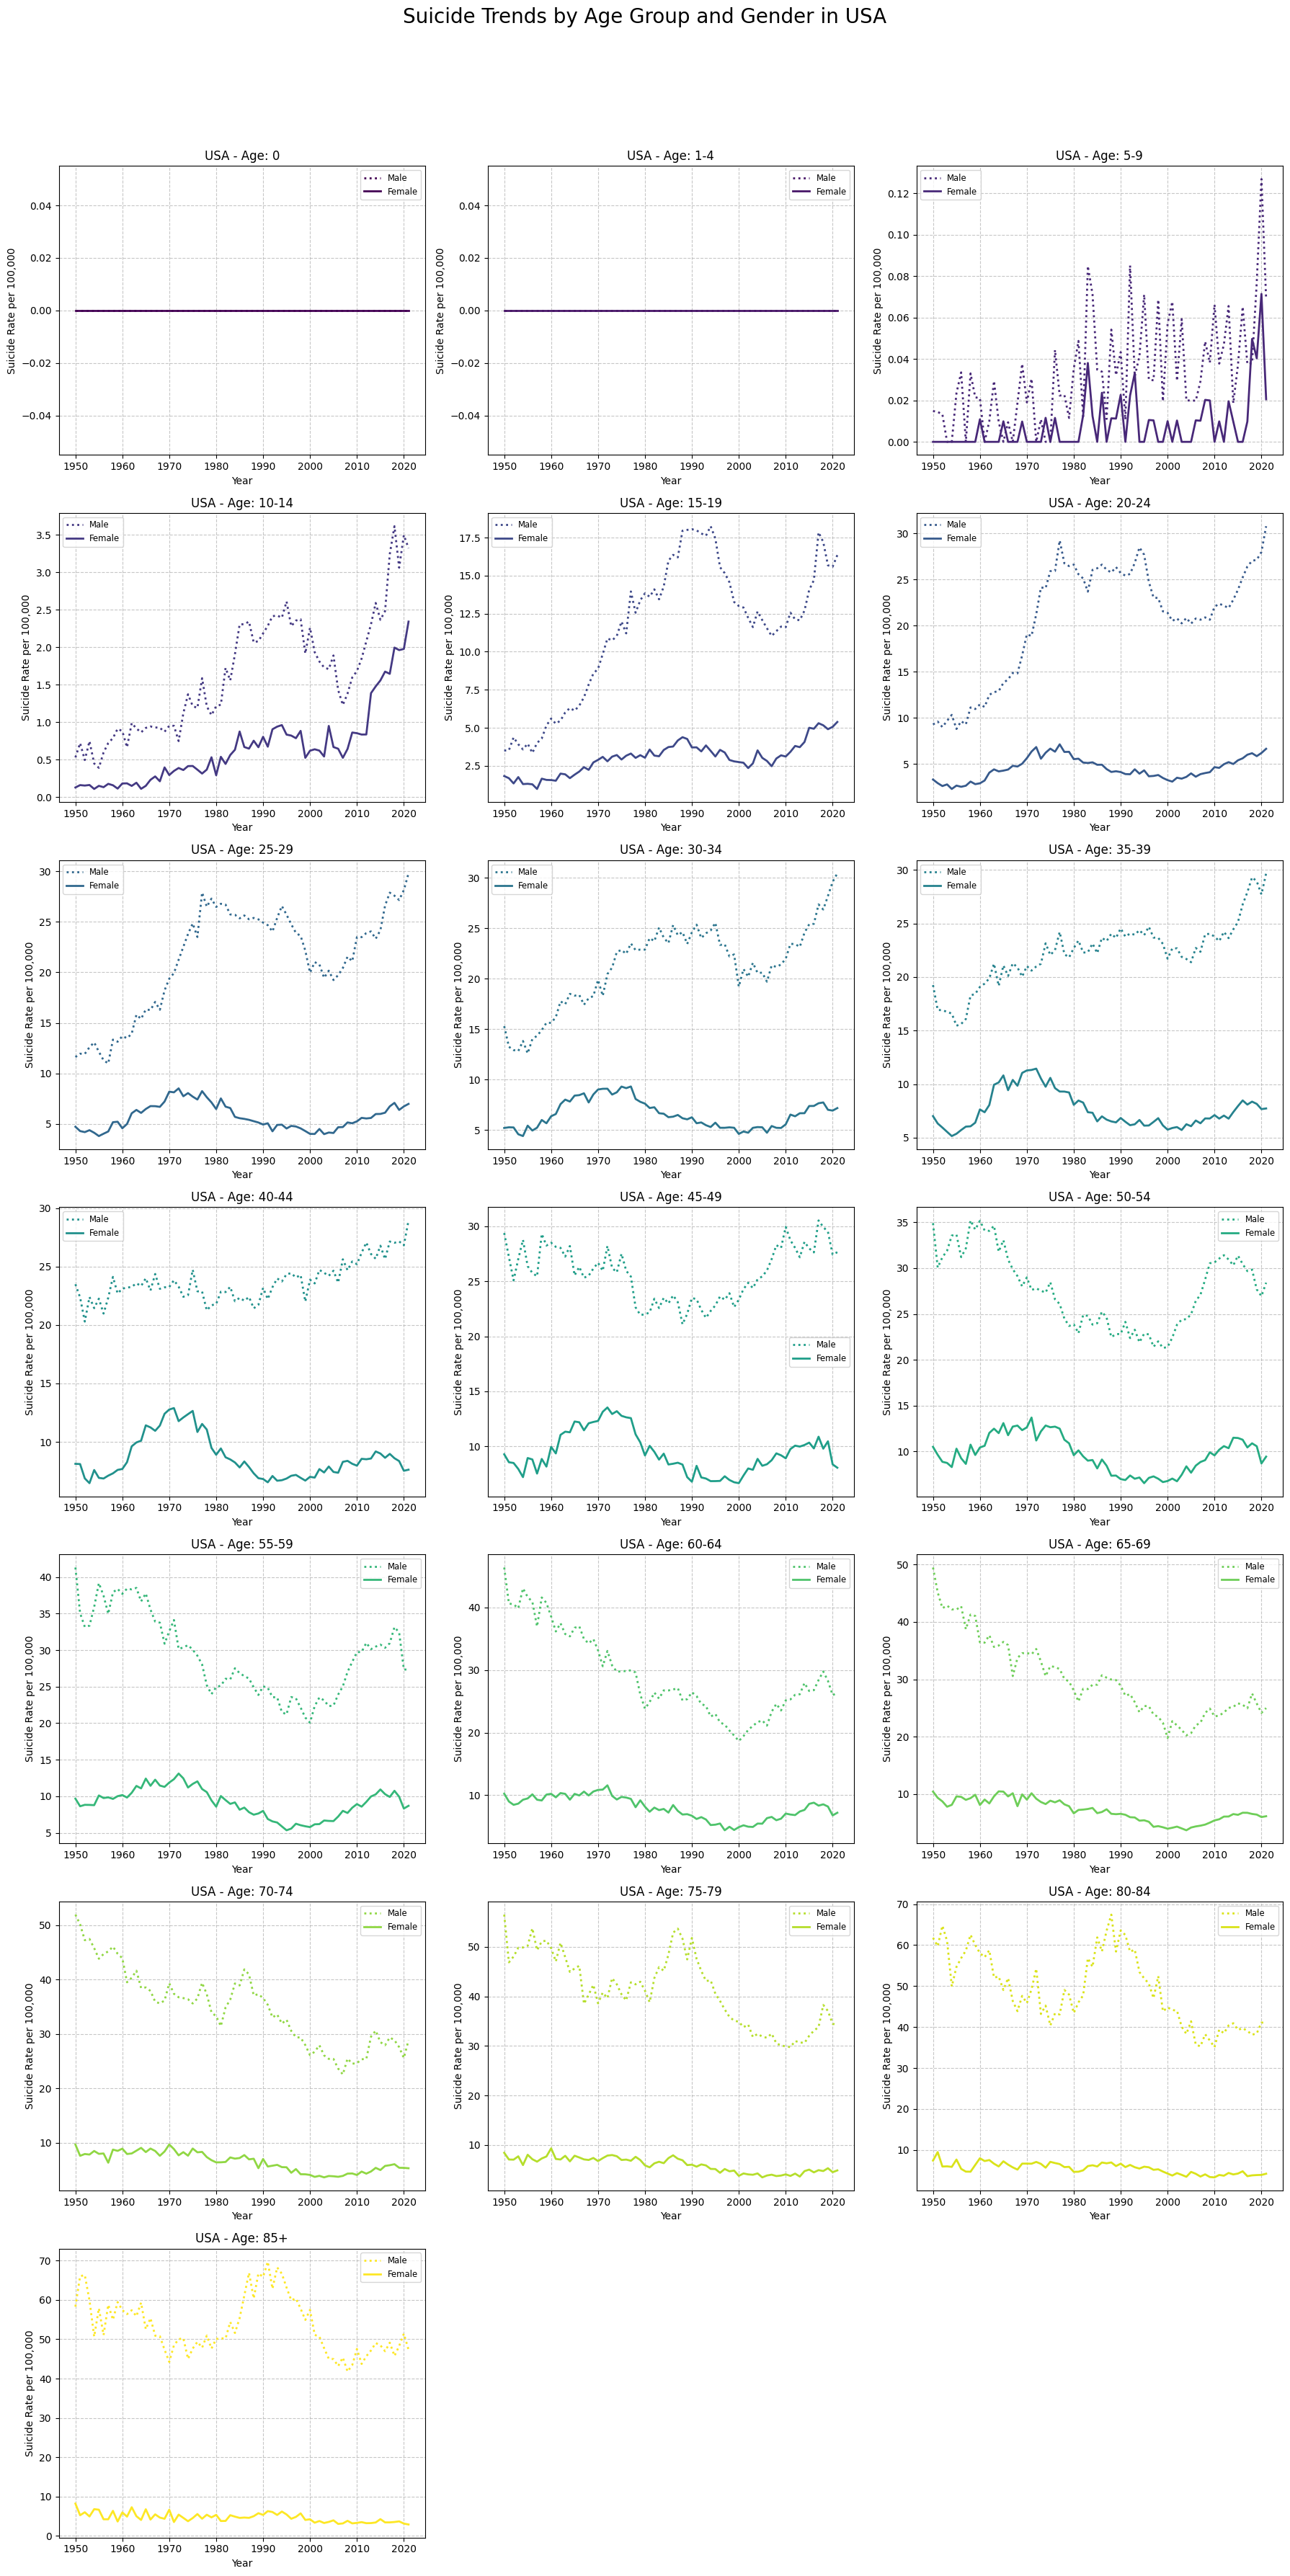

In [15]:
# --- Function to Plot Time Trends for Age Group by Gender and Country ---

# This function takes a country name and the full DataFrame to generate plots.
# It assumes 'age_data' DataFrame is already loaded and 'sort_label_key' is defined.
def plot_age_gender_trends_by_country(country_name, data_df):
    print(f"\nGenerating plots for: {country_name}")

    # Filter data for the specific country and exclude 'All' and 'Unknown' age groups/sexes.
    country_specific_data = data_df[
        (data_df['Country_Code'] == country_name) &
        (data_df['Age_Group'] != 'All') &
        (data_df['Age_Group'] != 'Unknown') &
        (data_df['Sex'].isin(['Male', 'Female']))
    ].copy()

    if country_specific_data.empty:
        print(f"No valid data found for {country_name} to generate plots.")
        return

    # Get unique age groups present in this country's data, excluding 'All' and 'Unknown', and sort them.
    # This sorted list will be used for subplot order.
    unique_age_groups_for_country = sorted(
        country_specific_data['Age_Group'].unique().tolist(),
        key=sort_label_key
    )

    # Determine the total number of numeric age groups for color mapping.
    # This ensures each age group gets a unique color from the colormap.
    num_numeric_age_groups = len([ag for ag in data_df['Age_Group'].unique() if ag not in ['All', 'Unknown']])
    cmap = cm.viridis # Changed colormap to viridis
    category_colors = [cmap(i / (num_numeric_age_groups - 1)) for i in range(num_numeric_age_groups)]

    # Create a mapping from each unique numeric age group to a specific color.
    age_group_to_color_map = {}
    sorted_all_numeric_age_groups = sorted([ag for ag in data_df['Age_Group'].unique() if ag not in ['All', 'Unknown']], key=sort_label_key)
    for idx, ag in enumerate(sorted_all_numeric_age_groups):
        age_group_to_color_map[ag] = category_colors[idx]


    # Calculate grid dimensions for subplots: one subplot per age group.
    num_age_groups_to_plot = len(unique_age_groups_for_country)
    ncols = 3 # Setting to 3 columns per row as requested
    nrows = (num_age_groups_to_plot + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows), sharex=False, sharey=False)
    axes = axes.flatten() # Flatten for easier iteration

    plot_idx = 0
    # Iterate through each unique age group for the selected country.
    for age_group in unique_age_groups_for_country:
        ax = axes[plot_idx]
        plot_idx += 1

        # Filter data for the current age group.
        age_group_data = country_specific_data[country_specific_data['Age_Group'] == age_group].copy()

        if not age_group_data.empty:
            # Group by Year and Sex for plotting male/female lines.
            grouped_gender_data = age_group_data.groupby(['Year', 'Sex'])['Suicide_rate_per_100000'].mean().unstack()

            # Determine the base color for this age group directly from the new map.
            line_color = age_group_to_color_map.get(age_group, 'black') # Default fallback

            # Plot 'Male' line (dotted).
            if 'Male' in grouped_gender_data.columns:
                grouped_gender_data['Male'].plot(ax=ax, legend=False, color=line_color, linewidth=2, linestyle=':', label='Male')
            # Plot 'Female' line (solid).
            if 'Female' in grouped_gender_data.columns:
                grouped_gender_data['Female'].plot(ax=ax, legend=False, color=line_color, linewidth=2, linestyle='-', label='Female')

            ax.set_title(f'{country_name} - Age: {age_group}')
            ax.set_xlabel('Year')
            ax.set_ylabel('Suicide Rate per 100,000')
            ax.grid(True, linestyle='--', alpha=0.7)
            # Add a small legend to each subplot for Male/Female distinction.
            ax.legend(loc='best', fontsize='small')
        else:
            ax.set_title(f'{country_name} - Age: {age_group} (No Data)')
            ax.set_visible(False)

    # Remove any unused subplots.
    for j in range(plot_idx, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f'Suicide Trends by Age Group and Gender in {country_name}', fontsize=20, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout
    plt.show()

# --- Example Usage (Run these lines in your notebook after defining the function) ---
# Make sure 'age_data' DataFrame is available from your previous code block.
# Example for USA:
plot_age_gender_trends_by_country('USA', age_data)

# Example for JPN:
# plot_age_gender_trends_by_country('JPN', age_data)

# You can call this function for other countries in your target_countries list as well.
# plot_age_gender_trends_by_country('ECU', age_data)
# plot_age_gender_trends_by_country('BRA', age_data)
